# nCov2019数据分析

## 数据来源

本数据来源于[2019新型冠状病毒疫情时间序列数据仓库](https://github.com/BlankerL/DXY-2019-nCoV-Data)，其数据来源为[丁香园](https://3g.dxy.cn/newh5/view/pneumonia)。

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_util
import plot_util

from IPython.display import display, Markdown

In [2]:
city_name = '深圳'

In [3]:
display(Markdown('## ' + city_name + '数据'))

## 深圳数据

In [4]:
raw_data = data_util.load_data()

In [5]:
display(Markdown('### ' + city_name + '累计数量'))

### 深圳累计数量

In [6]:

city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
10718,广东省,深圳,291,0,16,0,2020-02-05 21:18:47.516,2020-02-05,0.0,5.498282
8448,广东省,深圳,316,0,22,0,2020-02-06 20:40:40.766,2020-02-06,0.0,6.962025
6136,广东省,深圳,339,0,31,0,2020-02-07 18:14:50.649,2020-02-07,0.0,9.144543
3076,广东省,深圳,354,0,39,0,2020-02-08 19:46:49.463,2020-02-08,0.0,11.016949
719,广东省,深圳,366,0,46,0,2020-02-09 17:51:22.934,2020-02-09,0.0,12.568306


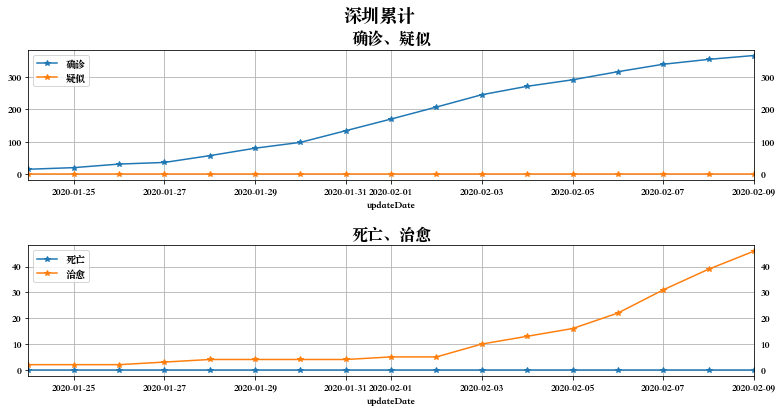

In [7]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [8]:
display(Markdown('### ' + city_name + '增长速度'))

### 深圳增长速度

In [9]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
10718,广东省,深圳,20.0,0.0,3.0,0.0,2020-02-05 21:18:47.516,2020-02-05,0.0,0.701234
8448,广东省,深圳,25.0,0.0,6.0,0.0,2020-02-06 20:40:40.766,2020-02-06,0.0,1.463744
6136,广东省,深圳,23.0,0.0,9.0,0.0,2020-02-07 18:14:50.649,2020-02-07,0.0,2.182517
3076,广东省,深圳,15.0,0.0,8.0,0.0,2020-02-08 19:46:49.463,2020-02-08,0.0,1.872406
719,广东省,深圳,12.0,0.0,7.0,0.0,2020-02-09 17:51:22.934,2020-02-09,0.0,1.551357


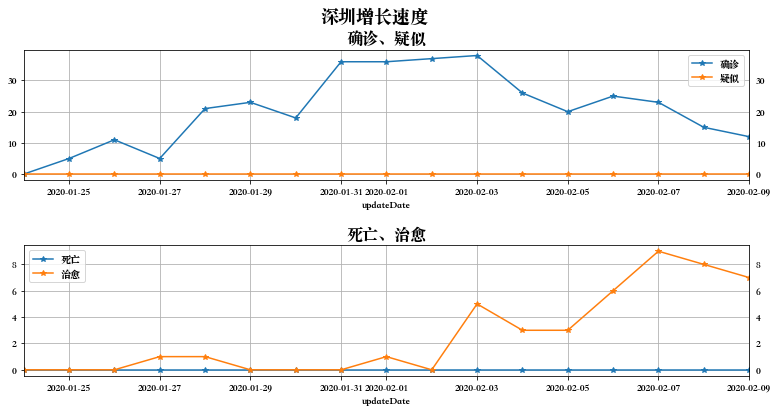

In [10]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [11]:
display(Markdown('### ' + city_name + '增长加速度'))

### 深圳增长加速度

In [12]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
10718,广东省,深圳,-6.0,0.0,0.0,0.0,2020-02-05 21:18:47.516,2020-02-05,0.0,-0.014182
8448,广东省,深圳,5.0,0.0,3.0,0.0,2020-02-06 20:40:40.766,2020-02-06,0.0,0.762510
6136,广东省,深圳,-2.0,0.0,3.0,0.0,2020-02-07 18:14:50.649,2020-02-07,0.0,0.718774
3076,广东省,深圳,-8.0,0.0,-1.0,0.0,2020-02-08 19:46:49.463,2020-02-08,0.0,-0.310111
719,广东省,深圳,-3.0,0.0,-1.0,0.0,2020-02-09 17:51:22.934,2020-02-09,0.0,-0.321050


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


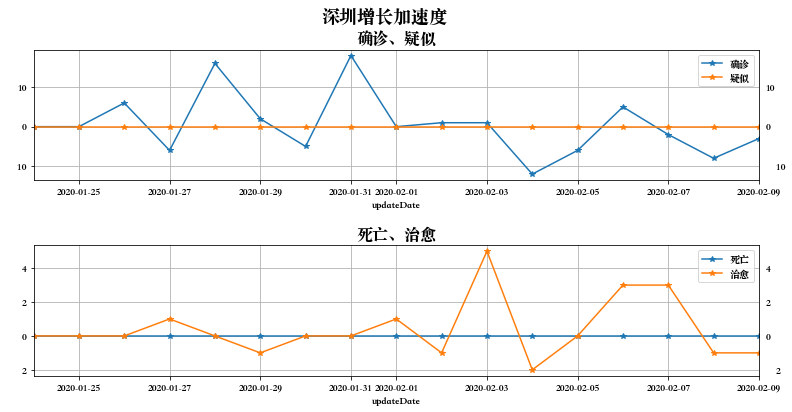

In [13]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [14]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 深圳死亡治愈率

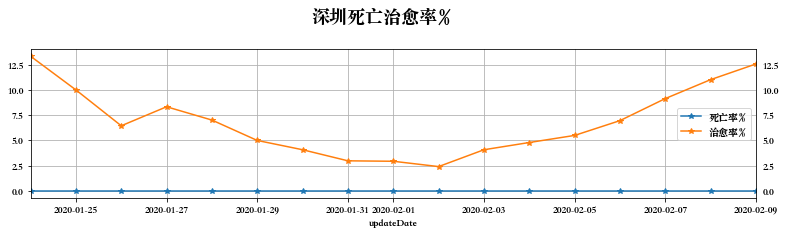

In [16]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')

In [15]:
black_province_name = '湖北省'

In [18]:
display(Markdown('## 全国数据（除' + black_province_name + '）'))

## 全国数据（除湖北省）

In [17]:
display(Markdown('因' + black_province_name + '灾情特别严重且现已隔离（' + black_province_name + '加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。'))

因湖北省灾情特别严重且现已隔离（湖北省加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。

In [19]:
display(Markdown('## 全国累计（除' + black_province_name + '）'))

## 全国累计（除湖北省）

In [20]:
white_daily_data = data_util.aggregate_daily_except(raw_data, province_name=black_province_name)
white_daily_data = data_util.calculate_dead_cured_rate(white_daily_data)

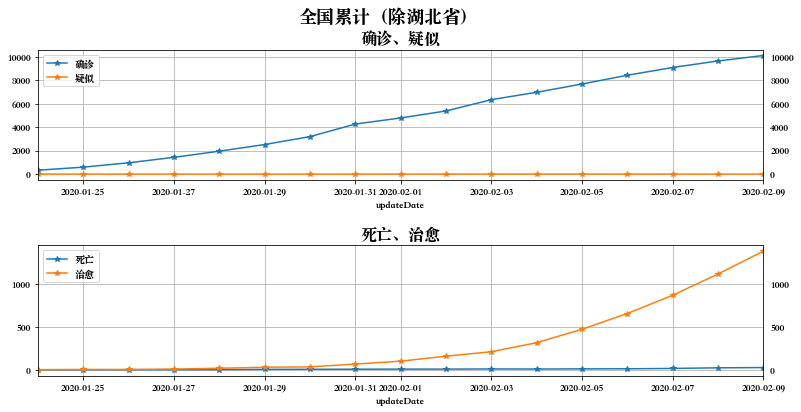

In [21]:
figure = plot_util.plot_conf_main(white_daily_data, '全国累计（除' + black_province_name + '）')

In [22]:
display(Markdown('## 全国增长速度（除' + black_province_name + '）'))

## 全国增长速度（除湖北省）

In [23]:
white_daily_data_1st_derivative = data_util.diff(white_daily_data)
white_daily_data_1st_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-05,704.0,0.0,156.0,2.0,0.011587,1.613539
2020-02-06,750.0,-2.0,184.0,1.0,-0.003200,1.633704
2020-02-07,660.0,0.0,212.0,4.0,0.031948,1.765627
2020-02-08,558.0,0.0,248.0,7.0,0.061106,2.017085
2020-02-09,466.0,0.0,266.0,3.0,0.017723,2.096260


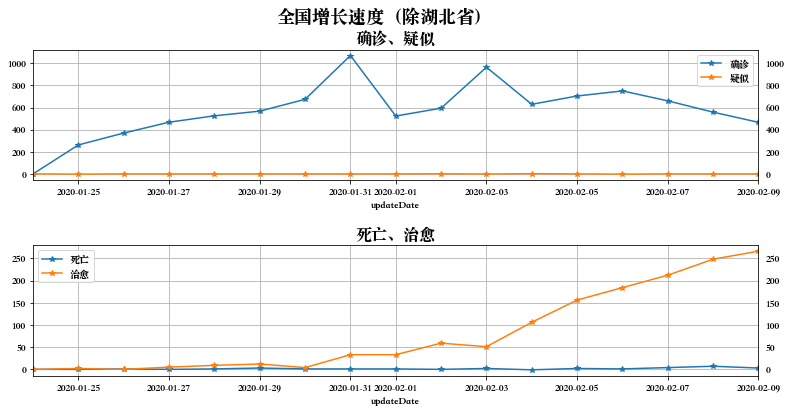

In [24]:
figure = plot_util.plot_conf_main(white_daily_data_1st_derivative, '全国增长速度（除' + black_province_name + '）')

In [25]:
display(Markdown('## 全国增长加速度（除' + black_province_name + '）'))

## 全国增长加速度（除湖北省）

In [26]:
white_daily_data_2nd_derivative = data_util.diff(white_daily_data_1st_derivative)
white_daily_data_2nd_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-05,75.0,-2.0,50.0,3.0,0.042976,0.395086
2020-02-06,46.0,-2.0,28.0,-1.0,-0.014786,0.020165
2020-02-07,-90.0,2.0,28.0,3.0,0.035148,0.131923
2020-02-08,-102.0,0.0,36.0,3.0,0.029158,0.251458
2020-02-09,-92.0,0.0,18.0,-4.0,-0.043383,0.079175


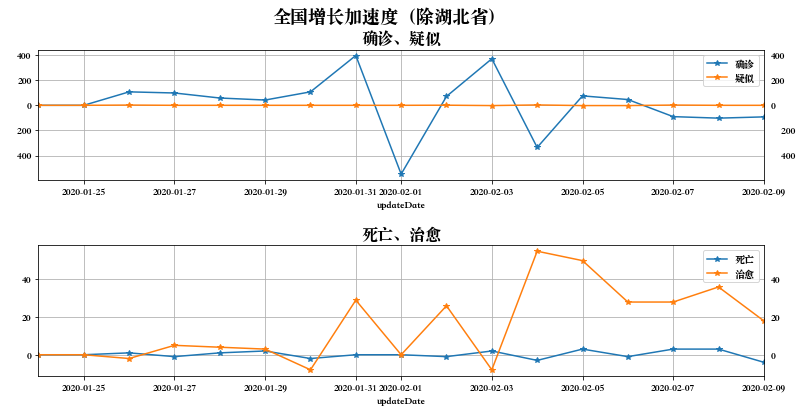

In [27]:
figure = plot_util.plot_conf_main(white_daily_data_2nd_derivative, '全国增长加速度（除' + black_province_name + '）')

In [28]:
display(Markdown('## 全国增死亡治愈率（除' + black_province_name + '）'))

## 全国增死亡治愈率（除湖北省）

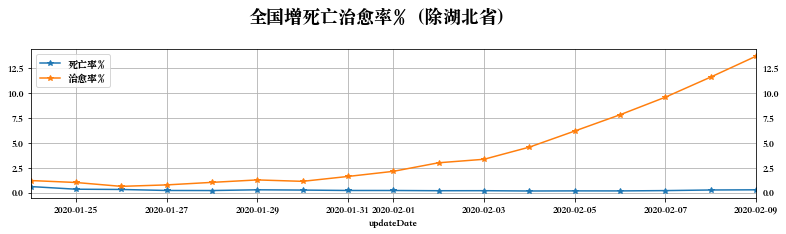

In [29]:
figure = plot_util.plot_conf_dead_cured_ratio(white_daily_data, '全国增死亡治愈率%（除' + black_province_name + '）')

In [30]:
city_name = '武汉'

In [31]:
display(Markdown('## ' + city_name + '数据'))

## 武汉数据

In [32]:
raw_data = data_util.load_data()

In [33]:
display(Markdown('### ' + city_name + '累计数量'))

### 武汉累计数量

In [34]:
city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
10458,湖北省,武汉,8351,0,374,362,2020-02-05 23:52:29.021,2020-02-05,4.334810,4.478506
8468,湖北省,武汉,10117,0,455,414,2020-02-06 20:28:31.381,2020-02-06,4.092122,4.497381
5427,湖北省,武汉,11618,0,542,478,2020-02-07 22:01:50.311,2020-02-07,4.114305,4.665175
2896,湖北省,武汉,13603,0,747,545,2020-02-08 22:02:50.042,2020-02-08,4.006469,5.491436
407,湖北省,武汉,14982,0,878,608,2020-02-09 19:09:33.896,2020-02-09,4.058203,5.860366


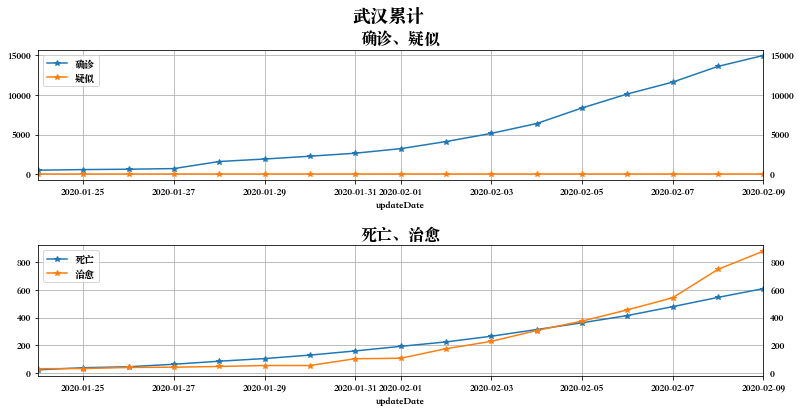

In [35]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [36]:
display(Markdown('### ' + city_name + '增长速度'))

### 武汉增长速度

In [37]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
10458,湖北省,武汉,1967.0,0.0,68.0,49.0,2020-02-05 23:52:29.021,2020-02-05,-0.568072,-0.314728
8468,湖北省,武汉,1766.0,0.0,81.0,52.0,2020-02-06 20:28:31.381,2020-02-06,-0.242688,0.018875
5427,湖北省,武汉,1501.0,0.0,87.0,64.0,2020-02-07 22:01:50.311,2020-02-07,0.022183,0.167794
2896,湖北省,武汉,1985.0,0.0,205.0,67.0,2020-02-08 22:02:50.042,2020-02-08,-0.107836,0.826261
407,湖北省,武汉,1379.0,0.0,131.0,63.0,2020-02-09 19:09:33.896,2020-02-09,0.051734,0.368930


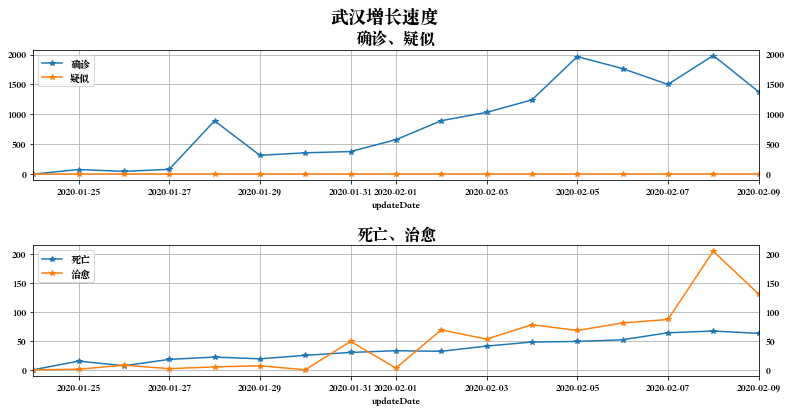

In [38]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [39]:
display(Markdown('### ' + city_name + '增长加速度'))

### 武汉增长加速度

In [40]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
10458,湖北省,武汉,725.0,0.0,-10.0,1.0,2020-02-05 23:52:29.021,2020-02-05,-0.317317,-0.673888
8468,湖北省,武汉,-201.0,0.0,13.0,3.0,2020-02-06 20:28:31.381,2020-02-06,0.325384,0.333603
5427,湖北省,武汉,-265.0,0.0,6.0,12.0,2020-02-07 22:01:50.311,2020-02-07,0.264871,0.148919
2896,湖北省,武汉,484.0,0.0,118.0,3.0,2020-02-08 22:02:50.042,2020-02-08,-0.130019,0.658467
407,湖北省,武汉,-606.0,0.0,-74.0,-4.0,2020-02-09 19:09:33.896,2020-02-09,0.159570,-0.457331


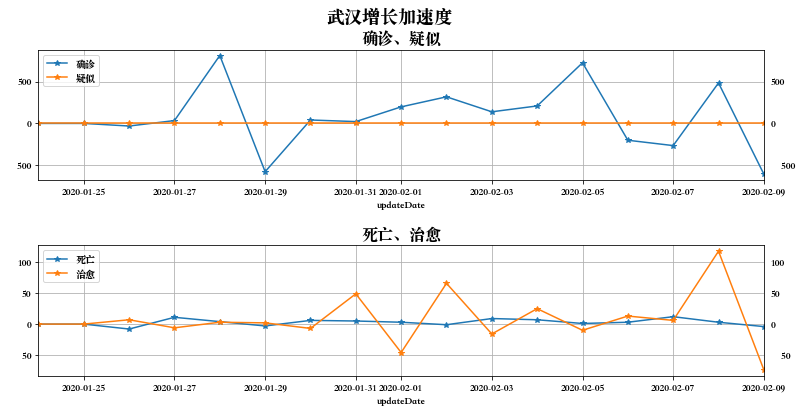

In [41]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [42]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 武汉死亡治愈率

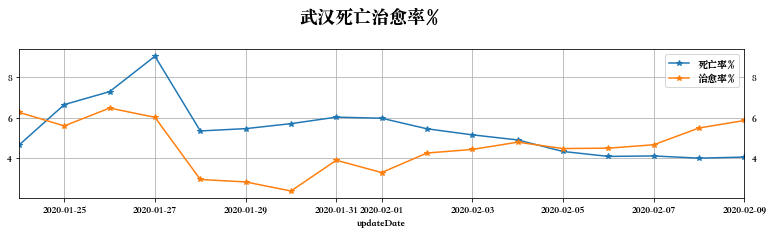

In [43]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')